# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
df_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = df_train.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# len(training_set_scaled)

### Creating a data structure with 60 timesteps and 1 output

In [5]:
# The rnn will look at the previous 60 stock prices i.e., 3 months as each financial month conatins 20 days and then it will
# try to predict the stock price for next day i.e., t+1
X_train = [] # will contain the previous 60 days stock price
y_train = [] # will contain the next day stock price
for i in range(60,len(training_set_scaled)):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [6]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

### Reshaping

In [7]:
                               #no. of stock prices  #no. of timestamps  #1 corresponds to the number of indicators
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
X_train.shape

(1198, 60, 1)

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [10]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2)) # 20% of the neurons/memory units will be ignored/dropped during each training iteration i.e during forward and back propagation


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(rate=0.2))

### Adding the output layer

In [15]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [16]:
regressor.compile(optimizer="adam", loss="mean_squared_error")

### Fitting the RNN to the Training set

In [20]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.0044
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 0.0037
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - loss: 0.0048
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.0043
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - loss: 0.0038
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - loss: 0.0040
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - loss: 0.0034
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - loss: 0.0037
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - loss: 0.0037
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - loss: 0.0035
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - loss: 0.0034
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 158ms/step - loss: 0.0034
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 0.0038
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - loss: 0.0035
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [21]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = df_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [22]:
df_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


### Visualising the results

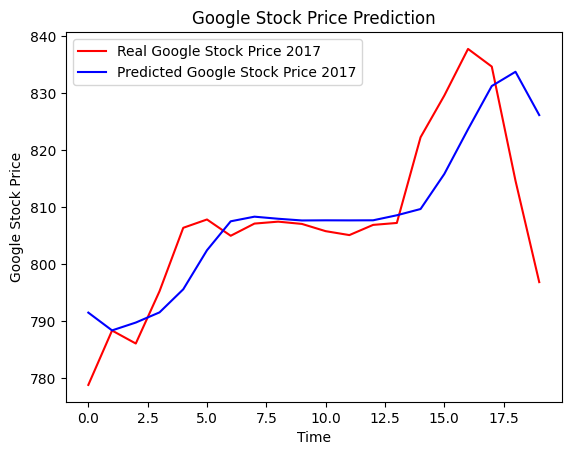

In [23]:
plt.plot(real_stock_price, color="red", label="Real Google Stock Price 2017")
plt.plot(predicted_stock_price, color="blue", label="Predicted Google Stock Price 2017")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()